#🛠️ Preparação dos Dados

In [10]:
#Extração do Arquivo Tratado

import pandas as pd

# Carregando o arquivo CSV que foi limpo na primeira parte
df = pd.read_csv('telecom_churn_limpo.csv')

# Exibindo as colunas atuais para ter certeza de que o ID está lá
print("Colunas antes da remoção:")
print(df.columns)

Colunas antes da remoção:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Contas_Diarias'],
      dtype='object')


In [11]:
#Remoção de Colunas Irrelevantes

# Removendo a coluna 'customerID'
# Usando 'axis=1' para indicar que queremos remover uma coluna
# Usando 'inplace=True' para que a mudança seja feita no próprio DataFrame
df.drop('customerID', axis=1, inplace=True)

# Exibindo as colunas após a remoção para confirmar
print("\nColunas após a remoção:")
print(df.columns)


Colunas após a remoção:
Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Contas_Diarias'],
      dtype='object')


In [13]:
#Encoding
import pandas as pd

# Carregando o DataFrame sem a coluna 'customerID'
# IMPORTANTE: Carregar o arquivo novamente para garantir que a coluna 'customerID' não esteja lá.
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)

# 1. Transformar a coluna 'Churn' em 0 e 1 (Variável-Alvo)
# Usando .map() para uma substituição mais explícita e clara.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# 2. Identificar todas as colunas categóricas restantes
# Selecionar as colunas com o tipo 'object' (texto)
colunas_categoricas = df.select_dtypes(include=['object']).columns

# 3. Aplicar One-Hot Encoding em todas as colunas categóricas
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Exibindo as primeiras linhas e as novas colunas para ver o resultado
print("Novo DataFrame após a codificação:")
print(df_encoded.head())

# Verificando o número de colunas antes e depois da codificação
print(f"\nNúmero de colunas antes do encoding: {len(df.columns)}")
print(f"Número de colunas após o encoding: {len(df_encoded.columns)}")

Novo DataFrame após a codificação:
   Churn  tenure  Charges.Monthly  Charges.Total  Contas_Diarias  gender_Male  \
0      0       9             65.6         593.30        2.186667        False   
1      0       9             59.9         542.40        1.996667         True   
2      1       4             73.9         280.85        2.463333         True   
3      1      13             98.0        1237.85        3.266667         True   
4      1       3             83.9         267.40        2.796667        False   

   SeniorCitizen_Yes  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0              False         True            True              True  ...   
1              False        False           False              True  ...   
2              False        False           False              True  ...   
3               True         True           False              True  ...   
4               True         True           False              True  ...   

   StreamingTV_No int

In [14]:
# O DataFrame `df_encoded` já está pronto da etapa anterior

# Contar o número de clientes em cada categoria de Churn
proporcao_churn = df_encoded['Churn'].value_counts()

# Calcular as proporções em porcentagem
proporcao_percentual = df_encoded['Churn'].value_counts(normalize=True) * 100

print("--- Proporção de Clientes por Churn ---")
print("Contagem:")
print(proporcao_churn)
print("\nPorcentagem:")
print(proporcao_percentual)

--- Proporção de Clientes por Churn ---
Contagem:
Churn
0    5398
1    1869
Name: count, dtype: int64

Porcentagem:
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


In [20]:
# Normalização das Variáveis Numéricas

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# IMPORTANTE: Vamos carregar o arquivo e fazer os passos anteriores novamente para garantir
# que estamos trabalhando com o DataFrame correto
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)

# Removemos os valores ausentes
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Identificar as colunas numéricas que precisam ser normalizadas
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']

# Criar uma cópia do DataFrame para não modificar o original ainda
df_normalizado = df_encoded.copy()

# Instanciar o normalizador
scaler = StandardScaler()

# Aplicar o normalizador nas colunas numéricas
df_normalizado[colunas_numericas] = scaler.fit_transform(df_normalizado[colunas_numericas])

# Exibir as primeiras linhas do DataFrame normalizado para ver o resultado
print("DataFrame após a normalização das variáveis numéricas:")
print(df_normalizado.head())

DataFrame após a normalização das variáveis numéricas:
   Churn    tenure  Charges.Monthly  Charges.Total  Contas_Diarias  \
0      0 -0.952728         0.028037      -0.743818        0.028037   
1      0 -0.952728        -0.161183      -0.766256       -0.161183   
2      1 -1.156341         0.303568      -0.881554        0.303568   
3      1 -0.789837         1.103603      -0.459685        1.103603   
4      1 -1.197063         0.635533      -0.887483        0.635533   

   gender_Male  SeniorCitizen_Yes  Partner_Yes  Dependents_Yes  \
0        False              False         True            True   
1         True              False        False           False   
2         True              False        False           False   
3         True               True         True           False   
4        False               True         True           False   

   PhoneService_Yes  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0              True  ...                         

#🎯 Correlação e Seleção de Variáveis

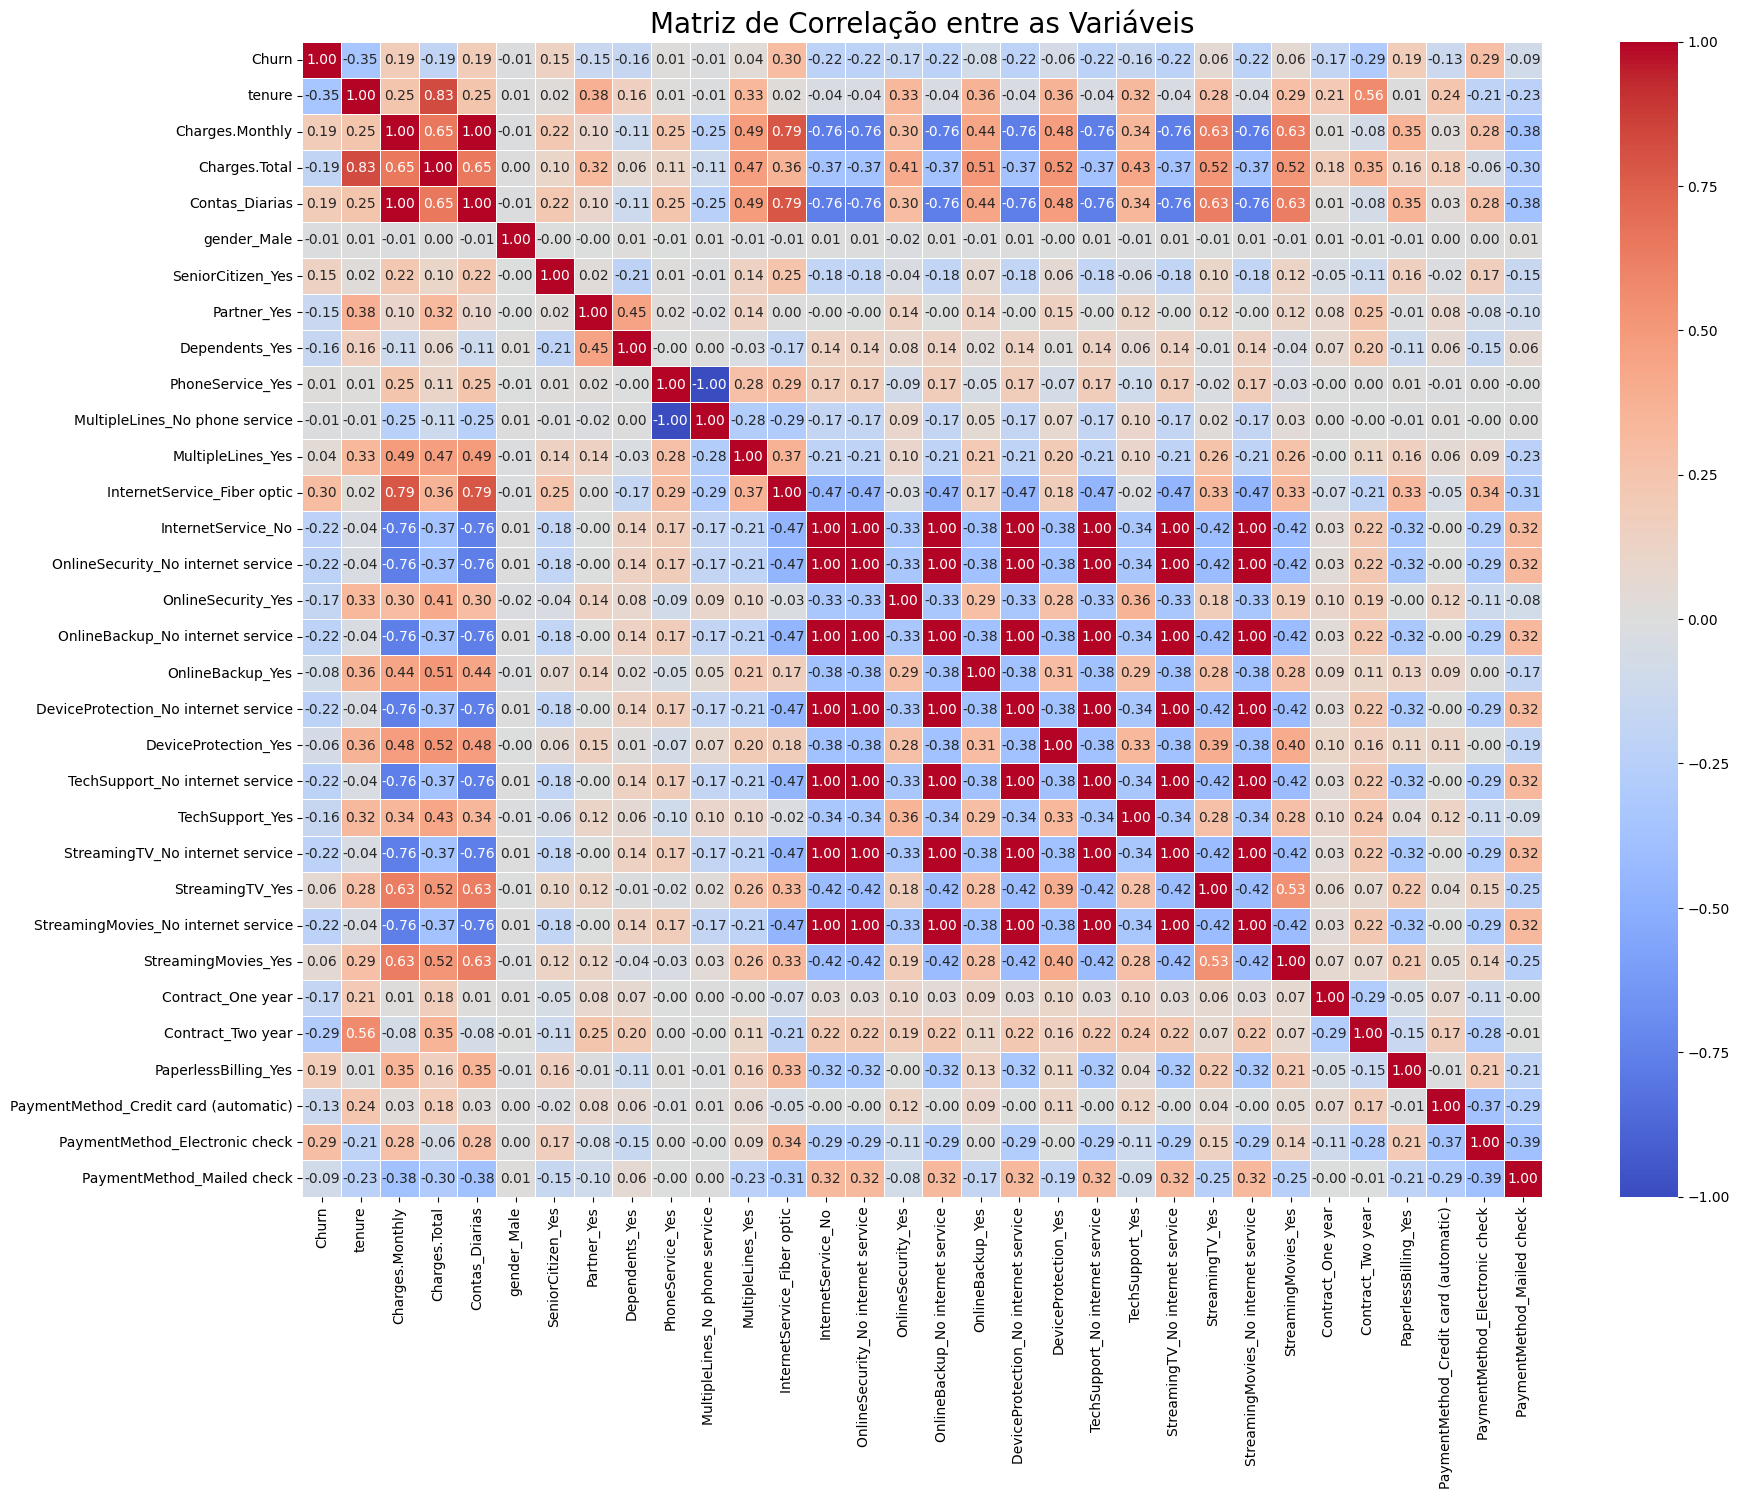

In [21]:
#Análise de Correlação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# IMPORTANTE: Vamos carregar o arquivo e fazer os passos anteriores novamente para garantir
# que estamos trabalhando com o DataFrame correto
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)

# Removemos os valores ausentes
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Identificar as colunas numéricas que precisam ser normalizadas
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']

# Criar uma cópia do DataFrame para não modificar o original ainda
df_normalizado = df_encoded.copy()

# Instanciar o normalizador
scaler = StandardScaler()

# Aplicar o normalizador nas colunas numéricas
df_normalizado[colunas_numericas] = scaler.fit_transform(df_normalizado[colunas_numericas])

# Calcular a matriz de correlação
matriz_correlacao = df_normalizado.corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(20, 15))

# Criar o heatmap
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre as Variáveis', fontsize=20)
plt.show()

#Análises Direcionadas

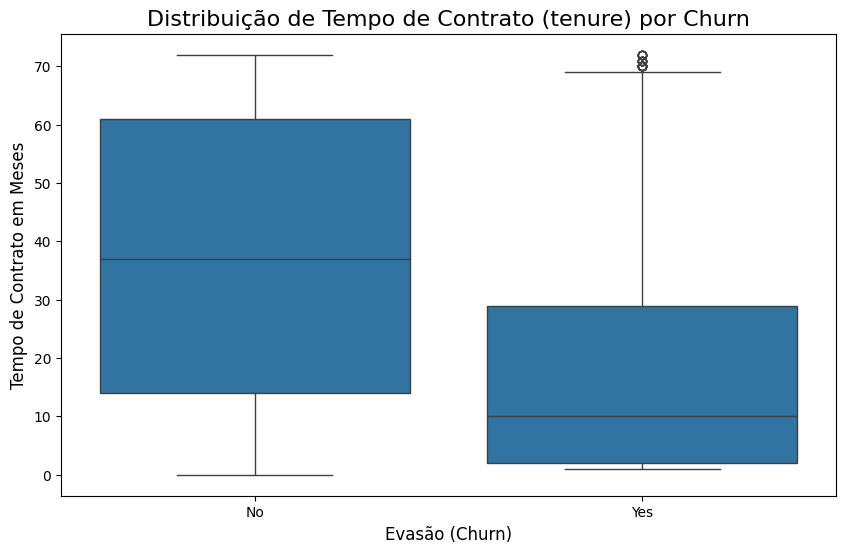

In [22]:
#Boxplot: Tempo de Contrato (tenure) vs. Evasão (Churn)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o DataFrame novamente para ter as colunas originais 'Yes' e 'No' para os rótulos do gráfico
df = pd.read_csv('telecom_churn_limpo.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribuição de Tempo de Contrato (tenure) por Churn', fontsize=16)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Tempo de Contrato em Meses', fontsize=12)
plt.show()

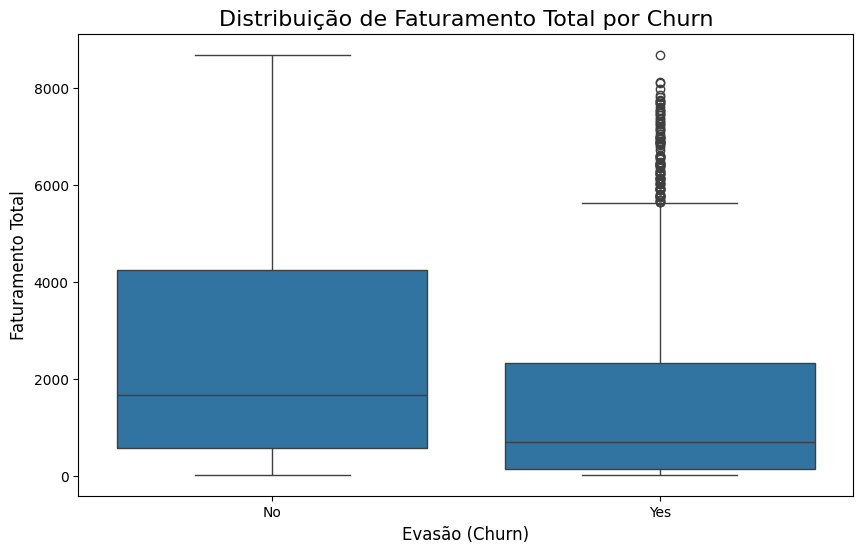

In [23]:
#Boxplot: Faturamento Total (Charges.Total) vs. Evasão (Churn)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usando o mesmo DataFrame 'df' carregado acima
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Distribuição de Faturamento Total por Churn', fontsize=16)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Faturamento Total', fontsize=12)
plt.show()

#🤖 Modelagem Preditiva

#Separação de Dados

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# IMPORTANTE: Vamos carregar o arquivo e fazer os pré-processamentos para ter o DataFrame correto
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)

# Lembre-se, essa etapa é crucial para remover as linhas com valores ausentes
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
df_normalizado = df_encoded.copy()
scaler = StandardScaler()
df_normalizado[colunas_numericas] = scaler.fit_transform(df_normalizado[colunas_numericas])

# Definir a variável-alvo (y) e as variáveis preditoras (X)
X = df_normalizado.drop('Churn', axis=1) # Todas as colunas, exceto 'Churn'
y = df_normalizado['Churn'] # A coluna 'Churn'

# Dividir os dados em conjuntos de treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir o tamanho de cada conjunto para confirmar a divisão
print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Tamanho do rótulo de treino (y_train): {y_train.shape}")
print(f"Tamanho do rótulo de teste (y_test): {y_test.shape}")

Tamanho do conjunto de treino (X_train): (5079, 31)
Tamanho do conjunto de teste (X_test): (2177, 31)
Tamanho do rótulo de treino (y_train): (5079,)
Tamanho do rótulo de teste (y_test): (2177,)


#Criação de Modelos

In [25]:
#Código para Treinar a Regressão Logística (com dados normalizados)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Carregar e preparar os dados novamente
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)

# Remover as linhas com valores ' ' que o pandas converte para NaN
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
df_normalizado = df_encoded.copy()
scaler = StandardScaler()
df_normalizado[colunas_numericas] = scaler.fit_transform(df_normalizado[colunas_numericas])

# Divisão dos dados em X e y
X_norm = df_normalizado.drop('Churn', axis=1)
y_norm = df_normalizado['Churn']
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=42)

# Instanciar e treinar o modelo de Regressão Logística
modelo_rl = LogisticRegression(random_state=42, max_iter=1000)
modelo_rl.fit(X_train_norm, y_train_norm)

print("Regressão Logística treinada com sucesso!")

Regressão Logística treinada com sucesso!


In [26]:
#Código para Treinar a Árvore de Decisão (sem normalização)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Carregar e preparar os dados sem a normalização
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Divisão dos dados em X e y (aqui não usamos o DataFrame normalizado!)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar e treinar o modelo de Árvore de Decisão
modelo_ad = DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_train, y_train)

print("Árvore de Decisão treinada com sucesso!")

Árvore de Decisão treinada com sucesso!


#Avaliação dos Modelos

In [27]:
#Modelo de Regressão Logística

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Carregamento e pré-processamento para a Regressão Logística (com dados normalizados)
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
df_normalizado = df_encoded.copy()
scaler = StandardScaler()
df_normalizado[colunas_numericas] = scaler.fit_transform(df_normalizado[colunas_numericas])
X_norm = df_normalizado.drop('Churn', axis=1)
y_norm = df_normalizado['Churn']
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=42)
modelo_rl = LogisticRegression(random_state=42, max_iter=1000)
modelo_rl.fit(X_train_norm, y_train_norm)

# Fazendo as previsões no conjunto de teste
previsoes_rl = modelo_rl.predict(X_test_norm)

# Avaliação do Modelo de Regressão Logística
print("--- Avaliação do Modelo de Regressão Logística ---")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test_norm, previsoes_rl))
print("\nRelatório de Classificação:")
print(classification_report(y_test_norm, previsoes_rl))

--- Avaliação do Modelo de Regressão Logística ---

Matriz de Confusão:
[[1471  159]
 [ 259  288]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1630
           1       0.64      0.53      0.58       547

    accuracy                           0.81      2177
   macro avg       0.75      0.71      0.73      2177
weighted avg       0.80      0.81      0.80      2177



In [28]:
#Modelo de Árvore de Decisão
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Carregamento e pré-processamento para a Árvore de Decisão (sem normalização)
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo_ad = DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_train, y_train)

# Fazendo as previsões no conjunto de teste
previsoes_ad = modelo_ad.predict(X_test)

# Avaliação do Modelo de Árvore de Decisão
print("\n--- Avaliação do Modelo de Árvore de Decisão ---")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, previsoes_ad))
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes_ad))


--- Avaliação do Modelo de Árvore de Decisão ---

Matriz de Confusão:
[[1326  304]
 [ 271  276]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1630
           1       0.48      0.50      0.49       547

    accuracy                           0.74      2177
   macro avg       0.65      0.66      0.66      2177
weighted avg       0.74      0.74      0.74      2177



#Interpretações e conclusões

In [30]:
#Análise de Importância da Regressão Logística

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Carregamento e pré-processamento (para garantir que os objetos estão corretos)
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
df_normalizado = df_encoded.copy()
scaler = StandardScaler()
df_normalizado[colunas_numericas] = scaler.fit_transform(df_normalizado[colunas_numericas])
X_norm = df_normalizado.drop('Churn', axis=1)
y_norm = df_normalizado['Churn']
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=42)
modelo_rl = LogisticRegression(random_state=42, max_iter=1000)
modelo_rl.fit(X_train_norm, y_train_norm)

# Criar um DataFrame com os coeficientes e os nomes das features
importancia_rl = pd.DataFrame({
  'feature': X_norm.columns,
  'coeficiente': modelo_rl.coef_[0]
})

# Calcular o valor absoluto e ordenar em ordem decrescente
importancia_rl['abs_coeficiente'] = abs(importancia_rl['coeficiente'])
importancia_rl = importancia_rl.sort_values(by='abs_coeficiente', ascending=False)

print("--- Importância das Variáveis (Regressão Logística) ---")
print(importancia_rl[['feature', 'coeficiente']].head(10)) # Mostra as 10 mais importantes

--- Importância das Variáveis (Regressão Logística) ---
                        feature  coeficiente
0                        tenure    -1.619046
26            Contract_Two year    -1.233351
2                 Charges.Total     0.958506
11  InternetService_Fiber optic     0.835233
25            Contract_One year    -0.565333
8              PhoneService_Yes    -0.487722
20              TechSupport_Yes    -0.417856
14           OnlineSecurity_Yes    -0.394800
24          StreamingMovies_Yes     0.323563
27         PaperlessBilling_Yes     0.321051


In [31]:
#Análise de Importância da Árvore de Decisão

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Carregamento e pré-processamento (sem normalização)
df = pd.read_csv('telecom_churn_limpo.csv')
df.drop('customerID', axis=1, inplace=True)
df.dropna(inplace=True)

# Corrigindo a linha de "replace" para evitar o aviso e usando uma abordagem mais robusta
# np.where é mais explícito: se 'Churn' for 'Yes', use 1, senão use 0.
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo_ad = DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_train, y_train)

# Criar um DataFrame com a importância das features e os nomes das features
importancia_ad = pd.DataFrame({
 'feature': X.columns,
 'importancia': modelo_ad.feature_importances_
})

# Ordenar em ordem decrescente
importancia_ad = importancia_ad.sort_values(by='importancia', ascending=False)

print("\n--- Importância das Variáveis (Árvore de Decisão) ---")
print(importancia_ad.head(10)) # Mostra as 10 mais importantes


--- Importância das Variáveis (Árvore de Decisão) ---
                           feature  importancia
0                           tenure     0.215065
2                    Charges.Total     0.203611
3                   Contas_Diarias     0.104757
1                  Charges.Monthly     0.103776
11     InternetService_Fiber optic     0.095584
29  PaymentMethod_Electronic check     0.024248
27            PaperlessBilling_Yes     0.022339
5                SeniorCitizen_Yes     0.020759
6                      Partner_Yes     0.020651
20                 TechSupport_Yes     0.019454
